<a href="https://colab.research.google.com/github/Rana-Altaify/Avocado_Price_forecasting/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Source**: https://www.kaggle.com/datasets/neuromusic/avocado-prices

# **Importing** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install prophet


In [ ]:
from prophet import Prophet

In [ ]:
avo=pd.read_csv("/content/avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# **TSF Case Study**

In [ ]:
avo.shape

(18249, 14)

In [ ]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
avo.isna().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [ ]:
avo=avo.sort_values("Date")

# **EDA**

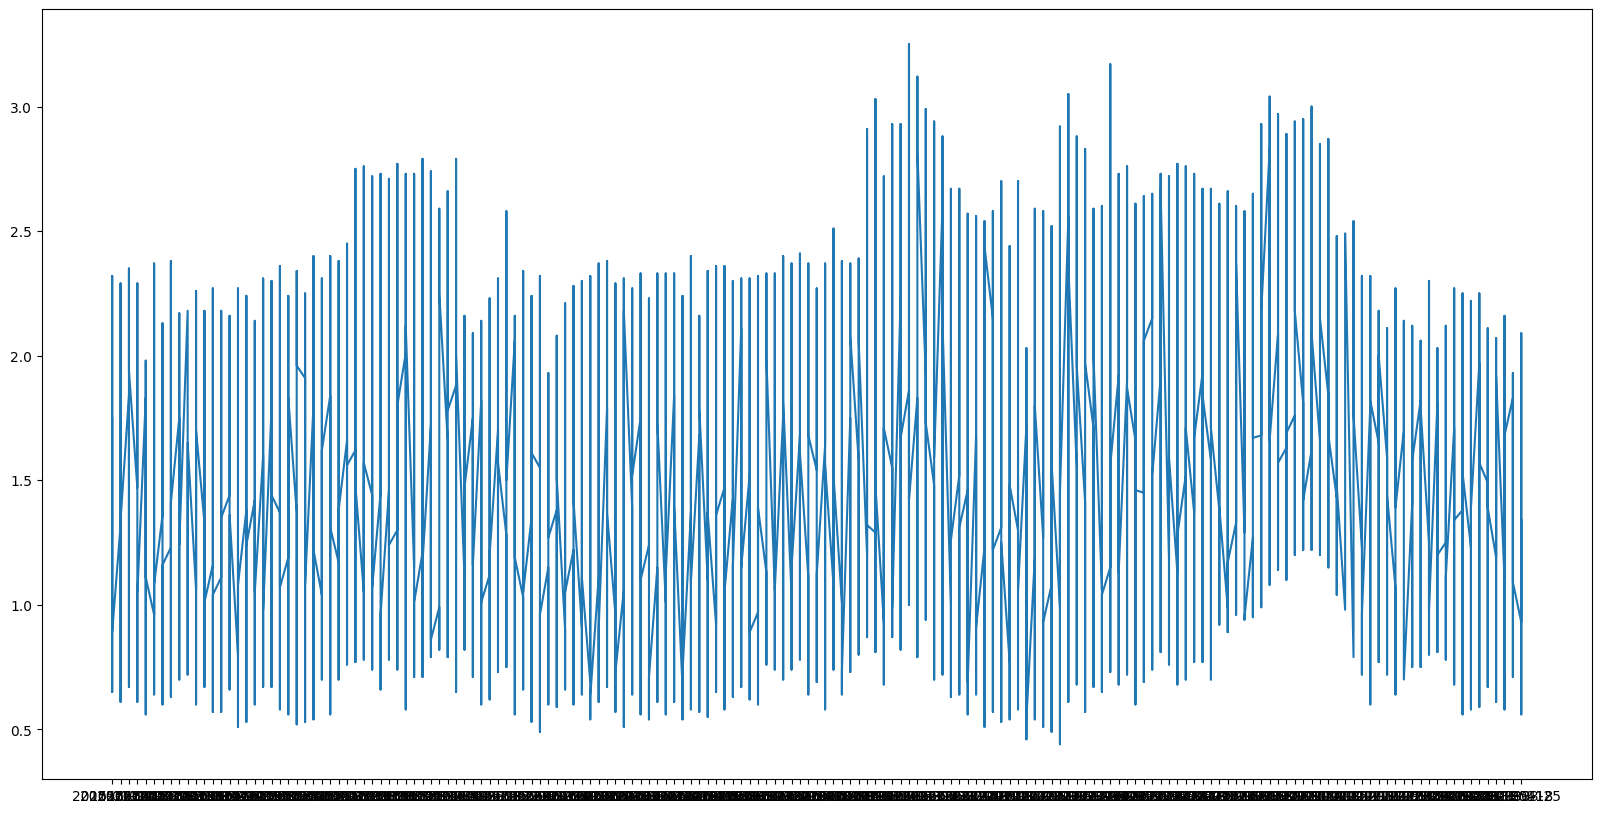

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(avo['Date'],avo['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

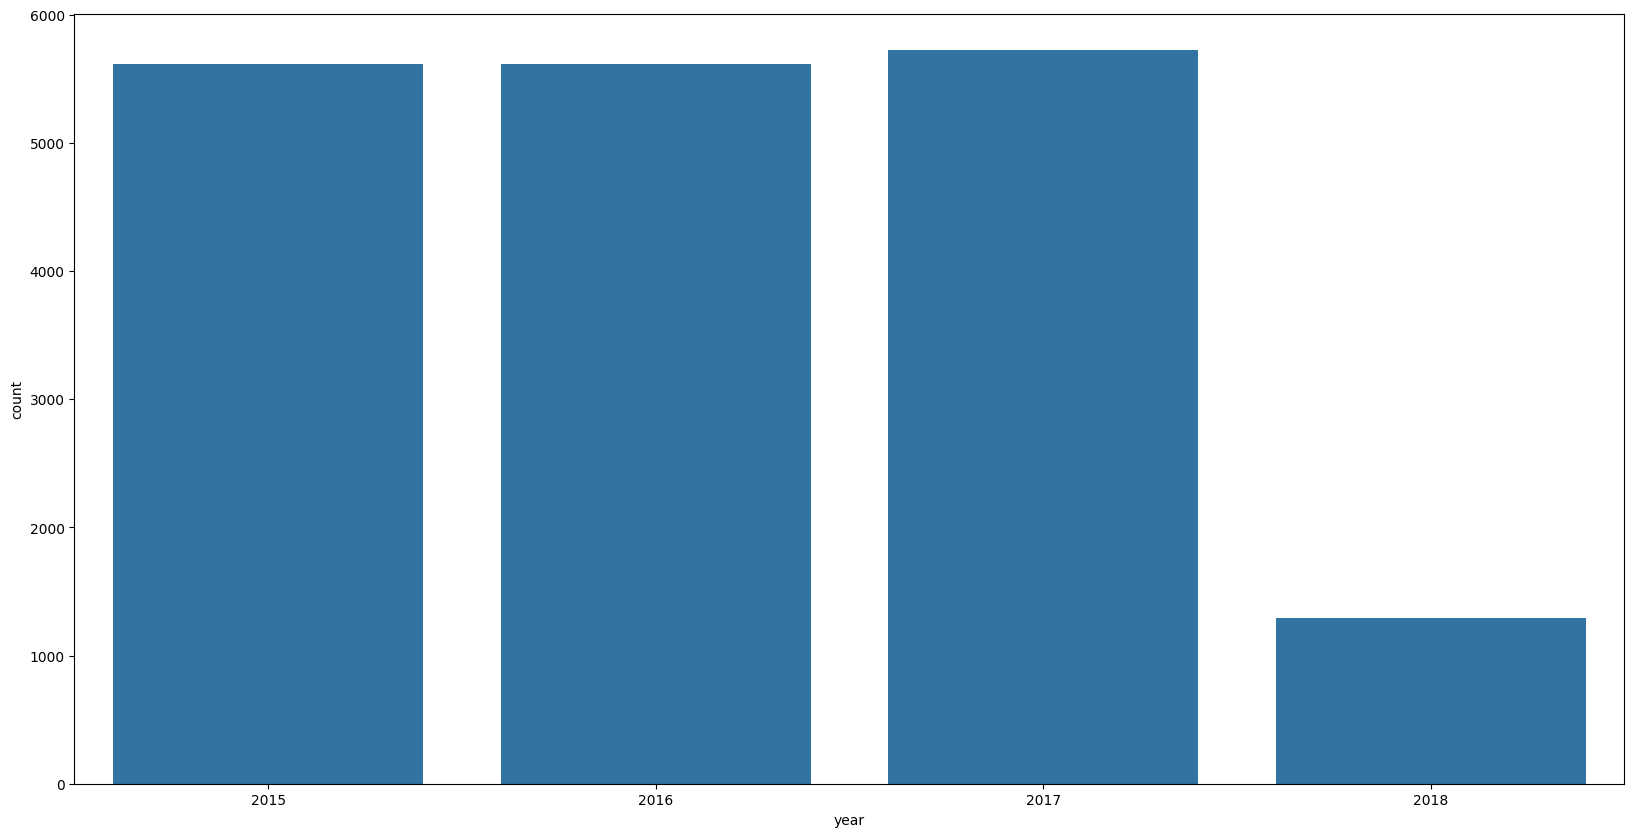

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='year',data=avo)

# **Pre-processing Data**

In [ ]:
avo_prophet=avo[['Date','AveragePrice']]

In [ ]:
avo_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [ ]:
avo_prophet.columns=['ds','y']

In [ ]:
model=Prophet()

In [ ]:
model.fit(avo_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmlj9odu/vxkz_23u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplmlj9odu/_yobeagr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90493', 'data', 'file=/tmp/tmplmlj9odu/vxkz_23u.json', 'init=/tmp/tmplmlj9odu/_yobeagr.json', 'output', 'file=/tmp/tmplmlj9odu/prophet_modeleyy1q5_3/prophet_model-20250727170036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:00:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:00:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=365)

In [ ]:
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501458,0.872248,1.853752,1.501458,1.501458,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,0.0,0.0,0.0,1.383616
1,2015-01-11,1.496064,0.915162,1.859839,1.496064,1.496064,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,0.0,0.0,0.0,1.386612
2,2015-01-18,1.490671,0.902282,1.891929,1.490671,1.490671,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,0.0,0.0,0.0,1.381639
3,2015-01-25,1.485278,0.921614,1.857789,1.485278,1.485278,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,0.0,0.0,0.0,1.357576
4,2015-02-01,1.479885,0.831234,1.809157,1.479885,1.479885,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,0.0,0.0,0.0,1.324300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.157864,0.542528,1.630169,0.938579,1.380510,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,0.0,0.0,0.0,1.071793
530,2019-03-22,1.157120,0.510603,1.627258,0.937035,1.380854,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,0.0,0.0,0.0,1.072824
531,2019-03-23,1.156375,0.542601,1.613083,0.935492,1.380963,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,0.0,0.0,0.0,1.074129
532,2019-03-24,1.155630,0.579598,1.606236,0.933948,1.381071,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,0.0,0.0,0.0,1.075690


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.071793,0.542528,1.630169
530,2019-03-22,1.072824,0.510603,1.627258
531,2019-03-23,1.074129,0.542601,1.613083
532,2019-03-24,1.075690,0.579598,1.606236
533,2019-03-25,1.077479,0.540421,1.656074


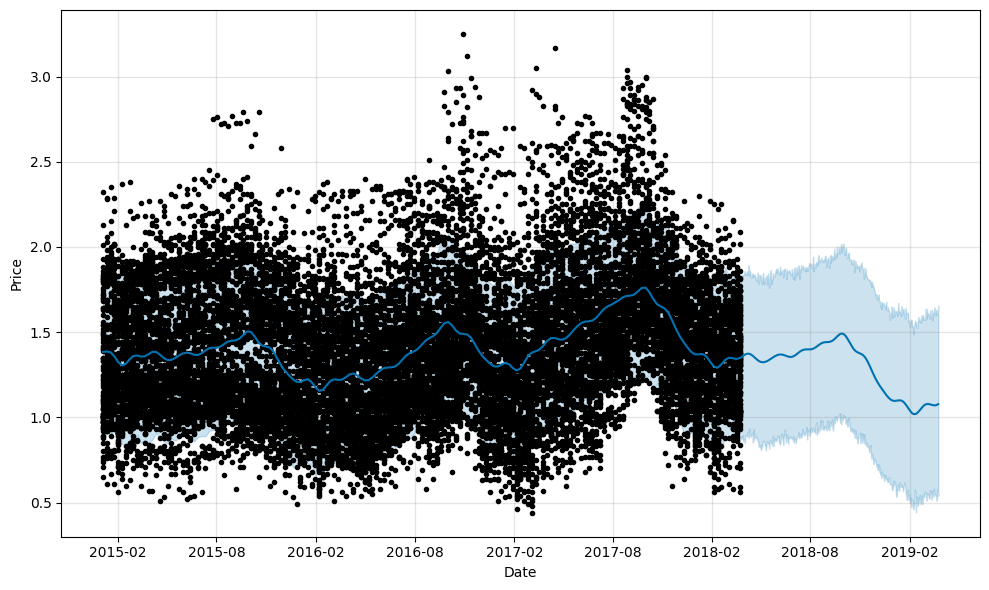

In [ ]:
fig_forecast=model.plot(forecast,xlabel='Date',ylabel='Price')

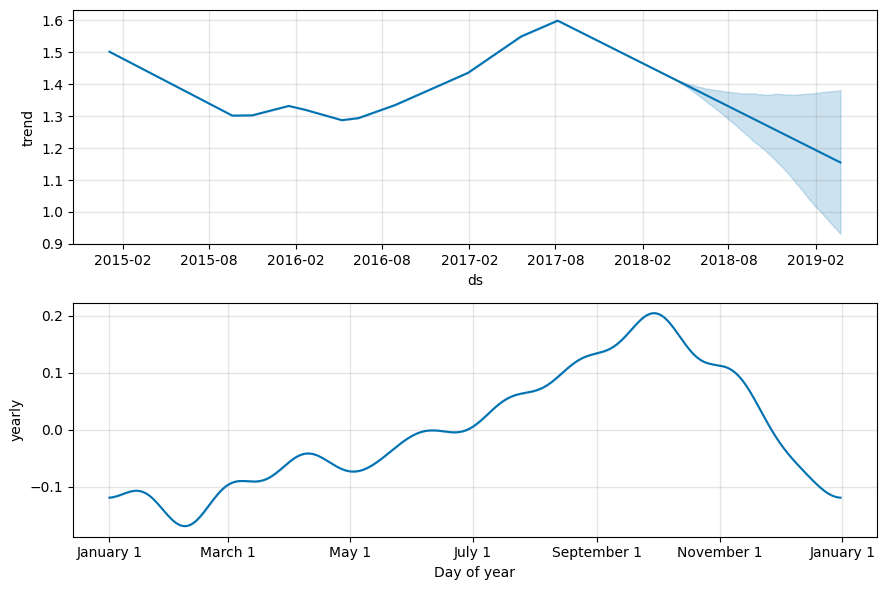

In [ ]:
fig_com=model.plot_components(forecast)